# Deutsch-Jozsa Algorithm
Created by Elisa Bäumer, modified by Junye Huang

In [1]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram

# load IBMQ account
provider = IBMQ.load_account()

/Users/junye/opt/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
def dj_oracle(n, case):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # We apply controlled-NOT gates for each qubit, using the 
        # output qubit as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [3]:
def dj_algorithm(n, case = 'random'):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # And set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # Let's append the oracle gate to our circuit:
    if case == 'random':
        random = np.random.randint(2)
        if random == 0:
            case = 'constant'
        else:
            case = 'balanced'
    oracle = dj_oracle(n, case)
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for i in range(n):
        dj_circuit.h(i)
        dj_circuit.measure(i, i)
    return dj_circuit

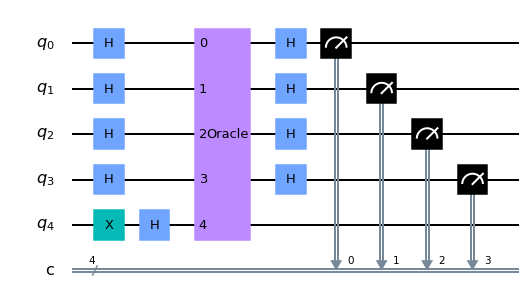

In [4]:
n = 4   
dj_circuit = dj_algorithm(n)
dj_circuit.draw('mpl')

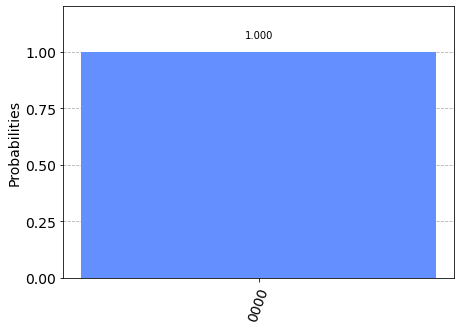

In [5]:
# use local simulator
backend = Aer.get_backend('qasm_simulator')
shots = 1
dj_circuit = dj_algorithm(n)
results = execute(dj_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [6]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)
%qiskit_job_watcher

least busy backend:  ibmq_athens


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [7]:
dj_circuit = dj_algorithm(n)
shots = 1024
job = execute(dj_circuit, backend=backend, shots=shots, optimization_level=3)

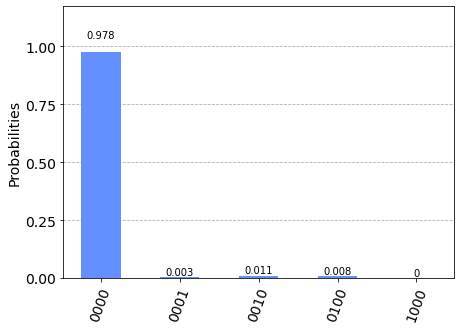

In [8]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

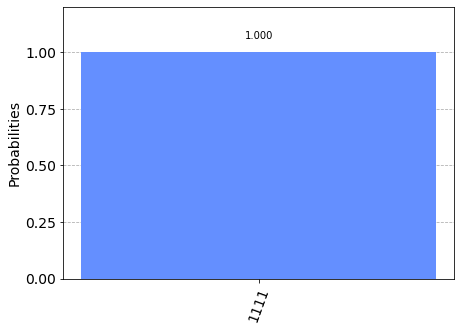

In [9]:
# jobs I ran before
ibmq_athens = provider.get_backend('ibmq_athens')
#ibmq_rome = provider.get_backend('ibmq_rome')
#old_job = ibmq_athens.retrieve_job('5f61c8d4f23dd600134049f5')  # constant
#old_job = ibmq_athens.retrieve_job('5f61cbd0de32c20013613587')  # balanced
#old_job = ibmq_athens.retrieve_job('5f641f89098d3b0012eb61f0') # constant one-shot
old_job = ibmq_athens.retrieve_job('5f641f9b9183ad0014fb7540') # balanced one-shot
results = old_job.result()
answer = results.get_counts()
plot_histogram(answer)